# Installation and Setup

In [94]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [95]:
from sklearn import datasets,metrics

In [96]:
#import datasets
cancer = datasets.load_breast_cancer()

In [97]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [98]:
#matrix of features - finding dependent variables
x = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)

In [99]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [100]:
# finding independent variables
y=cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [101]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [102]:
x.shape, y.shape

((569, 30), (569,))

In [103]:
#splitting into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [104]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [105]:
x_train #notice large diff in magnitudes of parameters - ex. mean radius and mean smoothness/ we must do feature scaling

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,0.2619,2.0150,1.778,16.85,0.007803,0.014490,0.01690,0.008043,0.02100,0.002778,11.160,26.84,71.98,384.0,0.14020,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,0.3077,1.6210,2.240,20.20,0.006543,0.021480,0.02991,0.010450,0.01844,0.002690,12.760,32.04,83.69,489.5,0.13030,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.012460,0.01831,0.008747,0.01500,0.001621,17.710,19.58,115.90,947.9,0.12060,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.011790,0.01131,0.015190,0.02220,0.003408,12.830,20.92,82.14,495.2,0.11400,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,0.2239,1.1390,1.577,18.04,0.005096,0.012050,0.00941,0.004551,0.01608,0.002399,14.170,31.99,92.74,622.9,0.12560,0.18040,0.1230,0.06335,0.3100,0.08203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,0.3283,0.8280,2.363,36.74,0.007571,0.011140,0.02623,0.014630,0.01930,0.001676,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,0.5079,1.2470,3.267,30.48,0.006836,0.008982,0.02348,0.006565,0.01942,0.002713,12.020,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,0.3539,4.8850,2.230,21.69,0.001713,0.006736,0.00000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559


In [106]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) #already 'fitted' to sc obj

In [107]:
#check scaling
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [108]:
#reshape to 2d 
x_train=x_train.reshape(455,30,1)
x_test=x_test.reshape(114,30,1)

In [109]:
x_train.shape, x_test.shape

((455, 30, 1), (114, 30, 1))

# Building Model

In [110]:
#define an object
model = tf.keras.models.Sequential()

In [111]:
#define first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=[30,1]))

#batch normalization - allows each layer to learn by itself a bit, independent of other layers - data processing speeds up
model.add(tf.keras.layers.BatchNormalization())

#Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [112]:
#define second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64,kernel_size=2,activation='relu'))

#batch normalization - allows each layer to learn by itself a bit, independent of other layers - data processing speeds up
model.add(tf.keras.layers.BatchNormalization())

#Dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [113]:
#Add flatten layer
model.add(tf.keras.layers.Flatten())

In [115]:
#dense layers
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [117]:
#compile the model

opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

model.compile(optimizer=opt,loss='binary_crossentropy', metrics='accuracy')

# Training the Model

In [118]:
history = model.fit(x_train,y_train,epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 31ms/step - loss: 0.9946 - accuracy: 0.5362 - val_loss: 0.6618 - val_accuracy: 0.7807
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.4980 - accuracy: 0.7774 - val_loss: 0.6087 - val_accuracy: 0.9035
Epoch 3/50
15/15 [==============================] - 0s 12ms/step - loss: 0.3539 - accuracy: 0.8593 - val_loss: 0.5678 - val_accuracy: 0.9211
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2566 - accuracy: 0.9019 - val_loss: 0.5317 - val_accuracy: 0.9211
Epoch 5/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2782 - accuracy: 0.9051 - val_loss: 0.4966 - val_accuracy: 0.9474
Epoch 6/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2157 - accuracy: 0.9056 - val_loss: 0.4644 - val_accuracy: 0.9474
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1667 - accuracy: 0.9362 - val_loss: 0.4341 - val_accuracy: 0.9474
Epoch 8/50
15

# Model Prediction

In [119]:
y_pred= model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [123]:
y_pred[2][0], y_test[2]

(1, 1)

In [131]:
cancer.target_names[y_pred[24][0]], cancer.target_names[y_test[24]]

('malignant', 'malignant')

In [134]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

print('accuracy score is {}'.format(accuracy_score(y_test,y_pred)))

[[44  3]
 [ 1 66]]
accuracy score is 0.9649122807017544


# Learning curve

In [135]:
def learning_curve(history,epoch):

  #training vs validation accuracy
  epoch_range= range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()


  #training vs validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()

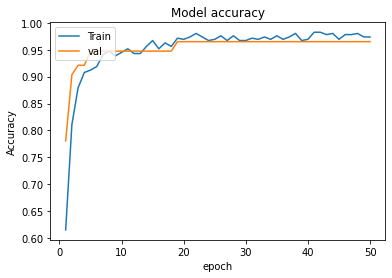

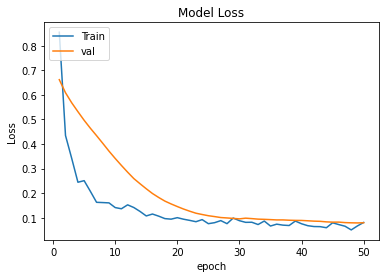

In [136]:
learning_curve(history,50)

In [137]:
#working fine, not overfitted